In [37]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import json
from spotipy.oauth2 import SpotifyClientCredentials
import config #file with client_id and secret for the Spotify API
import spotipy
from IPython.display import IFrame
import pandas as pd
from bs4 import BeautifulSoup
import requests
import random

In [24]:
#reading df with Spotify songs extracted with API (based on 1800-1900 songs)
df=pd.read_csv("https://raw.githubusercontent.com/okravtsova123/SongRecommendationML-k-means-/main/songs_with_AF.csv")
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id, client_secret= config.client_secret))

In [25]:
#dropping columns for analysis
columns_to_drop=['type', 'uri', 'track_href', 'analysis_url']
X=df.drop(columns_to_drop, axis=1)
# setting indexes as IDs - convinient for scaling
X.set_index("id", inplace=True)
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,
4gphxUgq0JSFv2BCLhNDiE,0.647,0.582,10,-9.538,0,0.0755,0.41000,0.000002,0.0715,0.915,167.396,146480,4
40riOy7x9W7GXjyGp4pjAv,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,391376,4
5ChkMS8OtdzJeqyybCc9R5,0.920,0.654,11,-3.051,0,0.0401,0.02360,0.015300,0.0360,0.847,117.046,293827,4
4u7EnebtmKWzUH433cf5Qv,0.414,0.404,0,-9.928,0,0.0499,0.27100,0.000000,0.3000,0.224,71.105,354320,4
7iN1s7xHE4ifF5povM6A48,0.443,0.403,0,-8.339,1,0.0322,0.63100,0.000000,0.1110,0.410,143.462,243027,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48td6xvpokdYwvbl3JIiXP,0.775,0.719,7,-6.212,0,0.0435,0.13200,0.000002,0.0662,0.712,117.513,246027,4
0PDCewmZCp0P5s00bptcdd,0.685,0.623,8,-11.146,1,0.0420,0.22800,0.002340,0.0295,0.896,126.739,171960,4
6s8nHXTJVqFjXE4yVZPDHR,0.762,0.863,0,-3.689,0,0.0561,0.01500,0.000000,0.1250,0.965,106.012,185587,4


In [26]:
#scaling
scaler=StandardScaler()
scaler.fit(X)
IDs=X.index
X_scaled=pd.DataFrame(scaler.transform(X))
X_scaled=X_scaled.set_index(IDs)
X_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12
id,,,,,,,,,,,,,
4gphxUgq0JSFv2BCLhNDiE,0.375545,-0.051680,1.293899,-0.009607,-1.133403,0.048147,0.317107,-0.641279,-0.742228,1.794873,1.731637,-0.871835,0.219613
40riOy7x9W7GXjyGp4pjAv,0.008515,-0.326140,-0.922705,-0.001232,0.882298,-0.652589,-0.875615,-0.639943,-0.847333,0.613393,0.998098,2.308670,0.219613
5ChkMS8OtdzJeqyybCc9R5,1.849062,0.215363,1.570975,0.996471,-1.133403,-0.463318,-0.822921,-0.599739,-1.008744,1.532322,-0.090359,1.041785,0.219613
4u7EnebtmKWzUH433cf5Qv,-0.882072,-0.711868,-1.476856,-0.070093,-1.133403,-0.321726,-0.092996,-0.641284,0.973234,-0.873110,-1.752808,1.827417,0.219613
7iN1s7xHE4ifF5povM6A48,-0.725544,-0.715577,-1.476856,0.176347,0.882298,-0.577459,0.969141,-0.641284,-0.445682,-0.154955,0.865547,0.382037,0.219613
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48td6xvpokdYwvbl3JIiXP,1.066425,0.456443,0.462673,0.506227,-1.133403,-0.414195,-0.503100,-0.641279,-0.782018,1.011081,-0.073460,0.420999,0.219613
0PDCewmZCp0P5s00bptcdd,0.580650,0.100386,0.739748,-0.258994,0.882298,-0.435867,-0.219863,-0.634930,-1.057543,1.721513,0.260398,-0.540922,0.219613
6s8nHXTJVqFjXE4yVZPDHR,0.996257,0.990527,-1.476856,0.897522,-1.133403,-0.232148,-0.848294,-0.641284,-0.340577,1.987925,-0.489642,-0.363946,0.219613


In [27]:
#training model for clustering
kmeans = KMeans(n_clusters=18, random_state=42)
kmeans.fit(X_scaled)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=18, random_state=42)

In [28]:
#identifying clusters
clusters = kmeans.predict(X_scaled)
clusters_df=pd.DataFrame(clusters).value_counts().sort_index()
clusters_df

0     210
1     472
2     455
3     128
4     108
5     330
6     161
7     315
8     254
9     138
10    374
11    228
12    222
13     33
14    224
15    134
16    160
17    461
Name: count, dtype: int64

In [29]:
#checking inertia
kmeans.inertia_

24062.156773987615

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

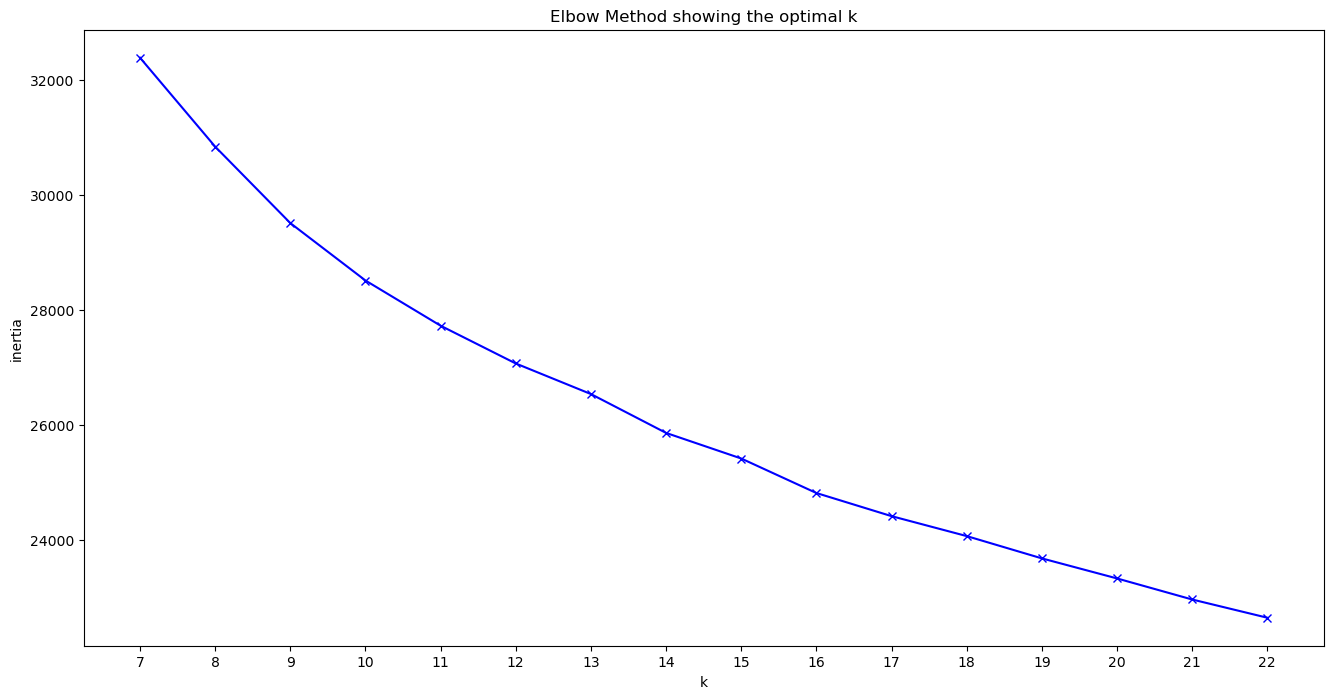

In [30]:
#choosing optimal k using lebow method
K = range(7, 23)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    n_init=10,
                    random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

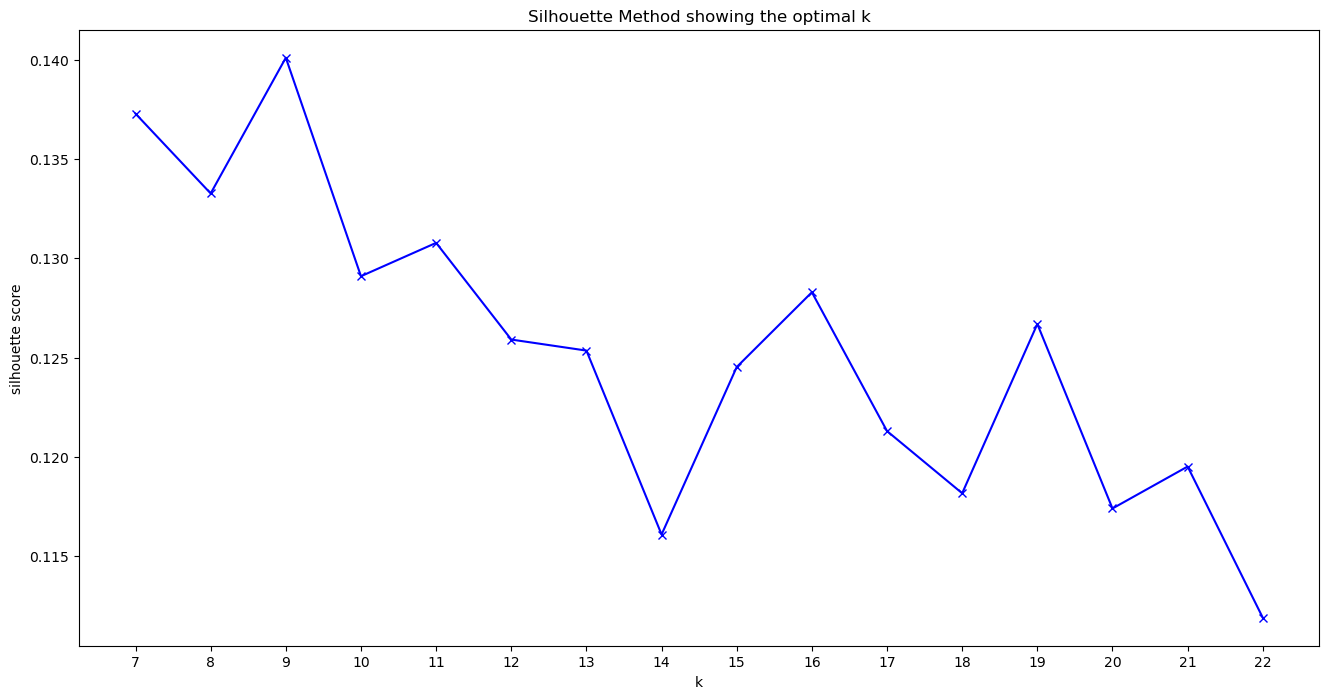

In [31]:
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    
    silhouette.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [32]:
#adding clusters
clusters=kmeans.predict(X_scaled)
X_scaled_w_clusters=X_scaled
X_scaled_w_clusters['cluster']=clusters

In [33]:
#all in functions

def user_input():
    song_input=input("input your favourite song:")
    song_input=song_input.lower()
    return search_spotify(song_input)

def search_spotify(song):
    song_name=song
    result=sp.search(q=song_name,type="track",market="GB")
    song_id=result['tracks']['items'][0]['id']
    return extracting_AF(song_id)

def extracting_AF(song_id):
    song_af=pd.DataFrame(sp.audio_features(song_id))
    song_af=song_af.drop(['type', 'uri', 'track_href', 'analysis_url'], axis=1)
    song_af=song_af.set_index("id")
    return scaling_transform(song_af)

def scaling_transform(df):
    ids=df.index
    scaled_df=pd.DataFrame(scaler.transform(df), columns=df.columns)
    scaled_df=scaled_df.set_index(ids)
    return recomendation(scaled_df)

def recomendation(scaled_df):
    #getting the cluster
    cluster_for_rec=kmeans.predict(scaled_df)[0]
    #checking df with this cluster and extracting sample
    recomended_song=X_scaled_w_clusters[X_scaled_w_clusters['cluster']==cluster_for_rec].sample()
    recomended_song_id=recomended_song.index[0]
    #playing recommended song
    recomended_song_id = str(recomended_song_id)
    return IFrame(src="https://open.spotify.com/embed/track/"+recomended_song_id,
                 width="320", height="80", frameborder="0",allowtransparency="true",allow="encrypted-media")

In [22]:
user_input()

input your favourite song:christmas


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [65]:
#STAGE 1

def user_input_song():
    song_input=input("input your favourite song:")
    print("")
    song_input=song_input.lower()
    k=0 #count of how many times we checked the charts
    return user_input_chart(song_input,k)

def user_input_chart(song,k):
    print("Got your song!")
    print("")
    print (f"We can check iTunes or Billboard, and if your song {song.upper()} is in top-100 recommend you other 'HOT' song")
    print("OR we can recommend you a similar song based on Spotify analysis")
    mode_choice=input("chose one of options. Billboard/iTunes/Spotify: ")
    mode_choice=mode_choice.lower()
    song_input=song
    k=k
    if mode_choice in ("itunes", "billboard"):
        if mode_choice=="itunes":
            return webscrap(mode_choice, song_input, k)
        else:
            return webscrap(mode_choice, song_input, k)
    elif mode_choice=="spotify":
        return search_spotify(song_input)
    else:
        print("sorry, don't understand you. Please, try again")
        return user_input_chart(song_input)

def soup_func(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content)
    return soup
        
def webscrap(chart, song, k):   
    song_input=song
    chart_input=chart
    k=k
    if chart_input=="itunes":
        #webscrapping iTunes
        url="https://www.popvortex.com/music/charts/top-100-songs.php"
        response=requests.get(url)
        soup_i=soup_func(url)
        #creating a lits of songs
        list_songs_itunes=[]
        for song in soup_i.select("cite.title"):
            list_songs_itunes.append(song.get_text(strip=True))

            #creating a lits of artists
        list_artists_itunes=[]
        for artist in soup_i.select("em.artist"):
            list_artists_itunes.append(artist.get_text(strip=True))

            #creating a dataframe

        df=pd.DataFrame({"song": list_songs_itunes, "artist":list_artists_itunes})
        df['source']='itunes'

        return recommendation_stage_1(song_input, chart_input, df, k)
    else:
            #webscrapping billboard
        url="https://www.billboard.com/charts/hot-100/"
        response=requests.get(url)
        soup_b=soup_func(url)

            #creating a list of top-100 songs
        list_songs=[]
        for song in soup_b.select("div.chart-results-list h3#title-of-a-story.c-title.a-no-trucate.a-font-primary-bold-s.u-letter-spacing-0021"):
            list_songs.append(song.get_text(strip=True))

            #creating a list of top-100 artists for those songs
        list_art=[]
        for artist in soup_b.select("div.chart-results-list span.c-label.a-no-trucate.a-font-primary-s"):
            list_art.append(artist.get_text(strip=True))

            #creating a dataframe
        df=pd.DataFrame({"song": list_songs, "artist": list_art})
        df['source']='billboard'

        return recommendation_stage_1(song_input, chart_input, df, k)

def recommendation_stage_1(song, chart, df_to_check, k):
    i=0
    check=0
    k=k
    song=song
    df=df_to_check
    for song_from_list in df_to_check['song']:
        if song!=song_from_list.lower():
            i=i+1
        else:
            check=1
            break
   
    if check==0 and k==0:
        other_chart_check=input(f"sorry your chosen song is not in the {chart.upper()} chart, do you want to try the other chart? Yes or no: ")
        print("")
        if other_chart_check.lower()=="yes" and chart=="itunes":
            k+=1
            chart="billboard"
            return webscrap(chart, song,k)
        elif other_chart_check.lower()=="yes" and chart=="billboard":
            k+=1
            chart="itunes"
            return webscrap(chart, song,k)
        else:
            other_song_check=input(f"Do you want to check another song in {chart} chart maybe? yes/no:")
            if other_song_check.lower()=="yes":
                song_new=input(f"another song you want to check in {chart.upper()} chart:")
                song_new=song_new.lower()
                return recommendation(song_new, chart, df,k)
            else:
                spotify_check=input("Do you want to get recomendation based on Spotify analysis? yes/no: ")
                spotify_check=spotify_check.lower()
                if spotify_check=="yes":
                    return search_spotify(song)
                else:
                    print("okay, see you later")
    elif check==0 and k!=0:
        if chart=="billboard":
            chart="itunes"
        else:
            chart="billboard"
            
        stage2_check=input(f"Sorry, not in the other list either. Do you want to have a recomendation of a song from Spotify? yes/no:")
        if stage2_check.lower()=="yes":
            return search_spotify(song)
        else:
            print("whatever, see ya later!")
    else:
        print(f"The song you've inputed is in {chart.upper()} chart!")
        print("")
        random_song = random.choice(df_to_check['song'])
        if random_song!=song.lower():
            row_w_song=df_to_check[df_to_check['song']==random_song]
            artist=row_w_song['artist'].iloc[0]
            print("You may like another one from the same chart, try this one:", random_song.upper(), "by", artist.upper())
            print("")
            spotify_check=input("Do you still want to get recomendation based on Spotify analysis? yes/no: ")
            spotify_check=spotify_check.lower()
            if spotify_check=="yes":
                return search_spotify(song)
        else:
            random_song = random.choice(filtered_df['song'])
            row_w_song=df_to_check[df_to_check['song']==random_song]
            artist=row_w_song['artist'].iloc[0]
            print("You may like another one from the same chart, try this one:", random_song.upper(), "by", artist.upper())
            print("")
            spotify_check=input("Do you still want to get recomendation based on Spotify analysis? yes/no: ")
            spotify_check=spotify_check.lower()
            if spotify_check=="yes":
                return search_spotify(song)
        choice=input('Do you want to try again? yes/no:')
        if choice.lower()=='yes':
            return user_input_song()

In [66]:
user_input_song()

input your favourite song:carnival

Got your song!

We can check iTunes or Billboard, and if your song CARNIVAL is in top-100 recommend you other 'HOT' song
OR we can recommend you a similar song based on Spotify analysis
chose one of options. Billboard/iTunes/Spotify: billboard
sorry your chosen song is not in the BILLBOARD chart, do you want to try the other chart? Yes or no: yes

The song you've inputed is in ITUNES chart!

You may like another one from the same chart, try this one: YOU NEED TO CALM DOWN by TAYLOR SWIFT

Do you still want to get recomendation based on Spotify analysis? yes/no: yes


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
